# `matplotlib`: create Pareto chart with story telling angle

## Imports

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## Data

In [7]:
# mock data
df = pd.DataFrame.from_dict(
    {
        "Online Workshop": 50,
        "Ebook": 145,
        "Webinar": 70,
        "Digital Assets": 90,
        "Consultation": 80,
        "Coaching Program": 40,
        "Membership": 60,
        "Online Course": 180
    },
    orient="index",
    columns=["items_sold"]
)

df

,items_sold
Online Workshop,50
Ebook,145
Webinar,70
Digital Assets,90
Consultation,80
Coaching Program,40
Membership,60
Online Course,180


### Sort the data

In [8]:
df.sort_values(
    by="items_sold",
    ascending=False,
    inplace=True
)

df

,items_sold
Online Course,180
Ebook,145
Digital Assets,90
Consultation,80
Webinar,70
Membership,60
Online Workshop,50
Coaching Program,40


### Calculate relative values for Pareto
* rel: relative value
* cs: cummulative sum
* rcs: realtive cummulative sume

In [9]:
df["rel"] = df["items_sold"] / df["items_sold"].sum()
df["cs"] = df["items_sold"].cumsum()
df["rcs"] = df["cs"] / df["items_sold"].sum()

df

,items_sold,rel,cs,rcs
Online Course,180,0.251748,180,0.251748
Ebook,145,0.202797,325,0.454545
Digital Assets,90,0.125874,415,0.580420
Consultation,80,0.111888,495,0.692308
Webinar,70,0.097902,565,0.790210
Membership,60,0.083916,625,0.874126
Online Workshop,50,0.069930,675,0.944056
Coaching Program,40,0.055944,715,1.000000


## Classic Pareto

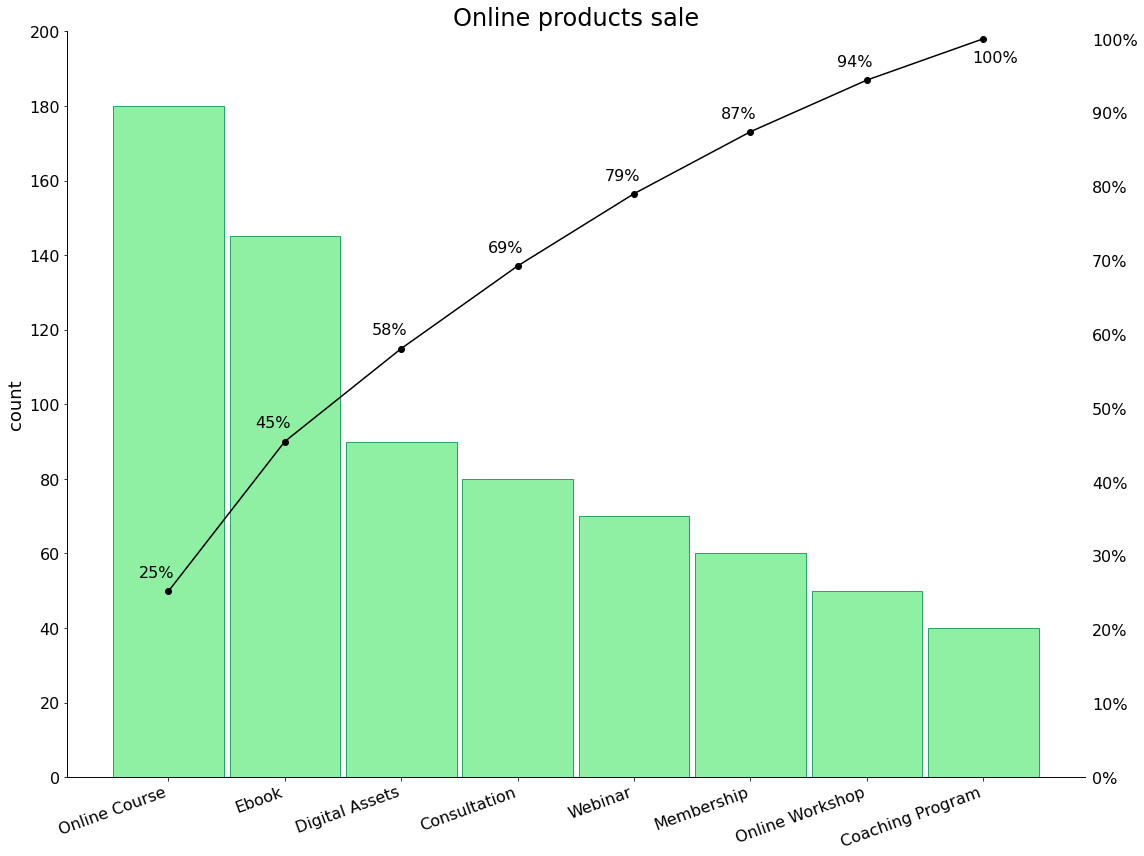

In [10]:
# plot
fig, ax = plt.subplots(
    figsize=(16, 12),
    facecolor="white"
)
ax.bar(
    x=df.index,
    height=df["items_sold"],
    width=0.95,
    color=[0.56, 0.94, 0.64],  # RGB [143, 240, 164]
    edgecolor=[0.15, 0.64, 0.41]  # RGB [38, 162, 105]
)

# add second Y-axis
ax2 = ax.twinx()

ax2.plot(
    df["rcs"],
    marker="o",
    color="black"
)

# axis settings
ax.set_title(
    "Online products sale",
    fontsize=24
)
ax.set_ylabel(
    "count",
    fontsize=18
);

# common parameters for the labels
text_params = {
    "fontsize": 16,
    "color": "black",
    "ha": "center",
    "va": "center"
}

# labels
for x_val, y_val in zip (range(len(df)), df["rcs"]):
    # set the format of the text to %
    text = f"{y_val:.0%}"
    
    # place the text labels on the graph
    if y_val > .95:
        ax2.text(
            x=x_val + 0.10,
            y=y_val - 0.025,
            s=text, 
            **text_params
        )
    else:
        ax2.text(
            x=x_val - 0.10,
            y=y_val + 0.025,
            s=text,
            **text_params
        )

ax.set_ylim(0, 200)
ax.set_yticks(range(0, 220, 20))

ax2.set_ylim(0, 1.01)
ax2.set_yticks(np.arange(0, 1.05, 0.1))
ax2.set_yticklabels([f"{y_val:.0%}" for y_val in np.arange(0, 1.05, 0.1)])

for a in [ax, ax2]:
    a.tick_params(
        axis="both",
        which="major",
        labelsize=16
    )

    # Hide spines
    a.spines.right.set_visible(False)
    a.spines.top.set_visible(False)

# Hide ticks
ax2.tick_params(right=False)

# Rotate x-axis tick labels
ax.set_xticks(range(len(df)))
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=20,
    ha="right"
);

plt.tight_layout()
plt.savefig(
    fname="plot1.png",
    format="png",
    dpi=125
);

## Tweaked bars 1

- remove line
- highlight only first two bars and add % as bar labels
- add legend

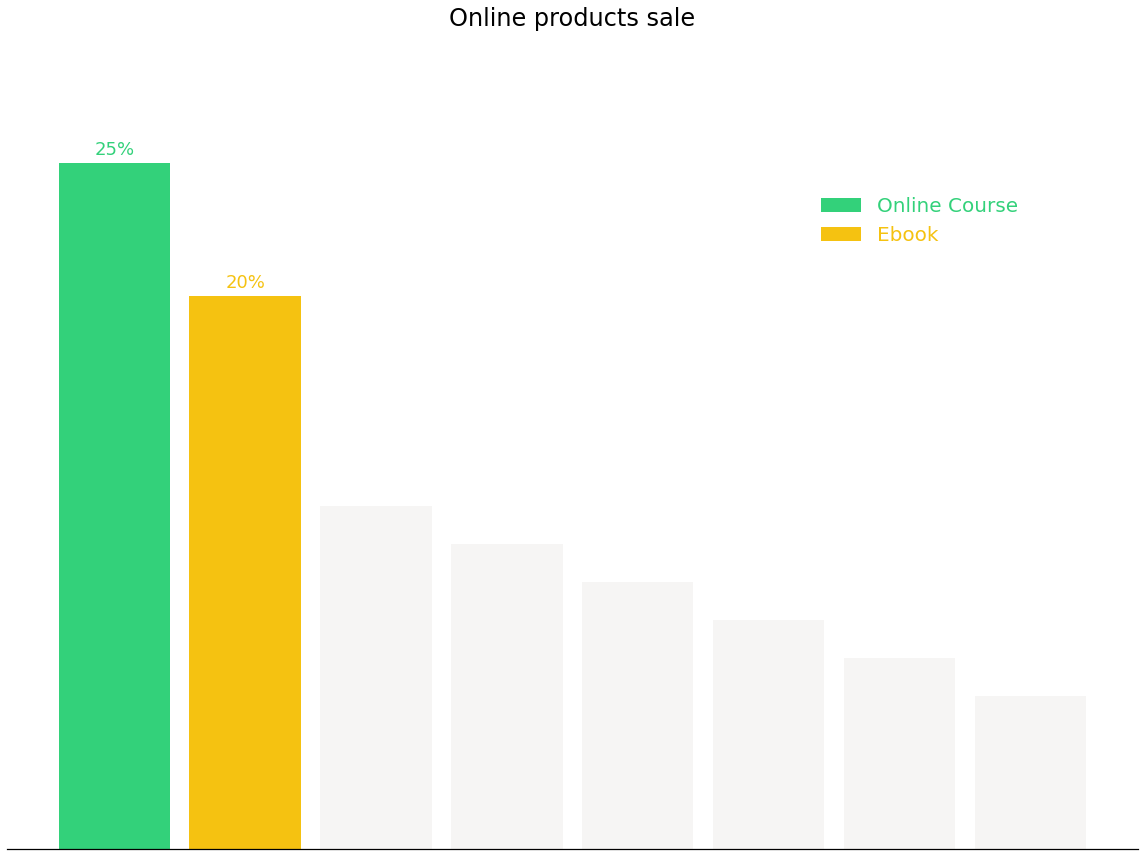

In [11]:
# plot
fig, ax = plt.subplots(
    figsize=(16, 12),
    facecolor="white"
)

# Plot bars
rect1 = ax.bar(
    x=df.index[0],
    height=df["rel"].iloc[0],
    width=0.85,
    color="#33d17a",  # GNOME green 3
    label=df.index[0]
)
rect2 = ax.bar(
    x=df.index[1],
    height=df["rel"].iloc[1],
    width=0.85,
    color="#f5c211",  # GNOME yellow 4
    label=df.index[1]
)
ax.bar(
    x=df.index[2:],
    height=df["rel"].iloc[2:],
    width=0.85,
    color="#f6f5f4"  # GNOME light 2
)

# Add bar data labels
ax.bar_label(
    rect1,
    padding=5,
    fontsize=18,
    color="#33d17a",  # GNOME green 3
    fmt="{:,.0%}"
)
ax.bar_label(
    rect2,
    padding=5,
    fontsize=18,
    color="#f5c211",  # GNOME yellow 4
    fmt="{:,.0%}"
)

# axis settings
ax.set_title(
    "Online products sale",
    fontsize=24
)

# axis limits
ax.set_ylim((0, 0.3))

# Hide spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.left.set_visible(False)

# remove ticks and tick labels
ax.tick_params(
    left=False,
    labelleft=False,
    bottom=False,
    labelbottom=False
)

# add legend
ax.legend(
    fontsize=20,
    frameon=False,
    bbox_to_anchor=(0.91, 0.82),
    labelcolor=["#33d17a", "#f5c211"]
)

# Update thickness of the bottom spine
ax.spines["bottom"].set_linewidth(1.25)

plt.tight_layout()
plt.savefig(
    fname="plot2.png",
    format="png",
    dpi=125
);

## Tweaked bars 2

- replace legend with annotation

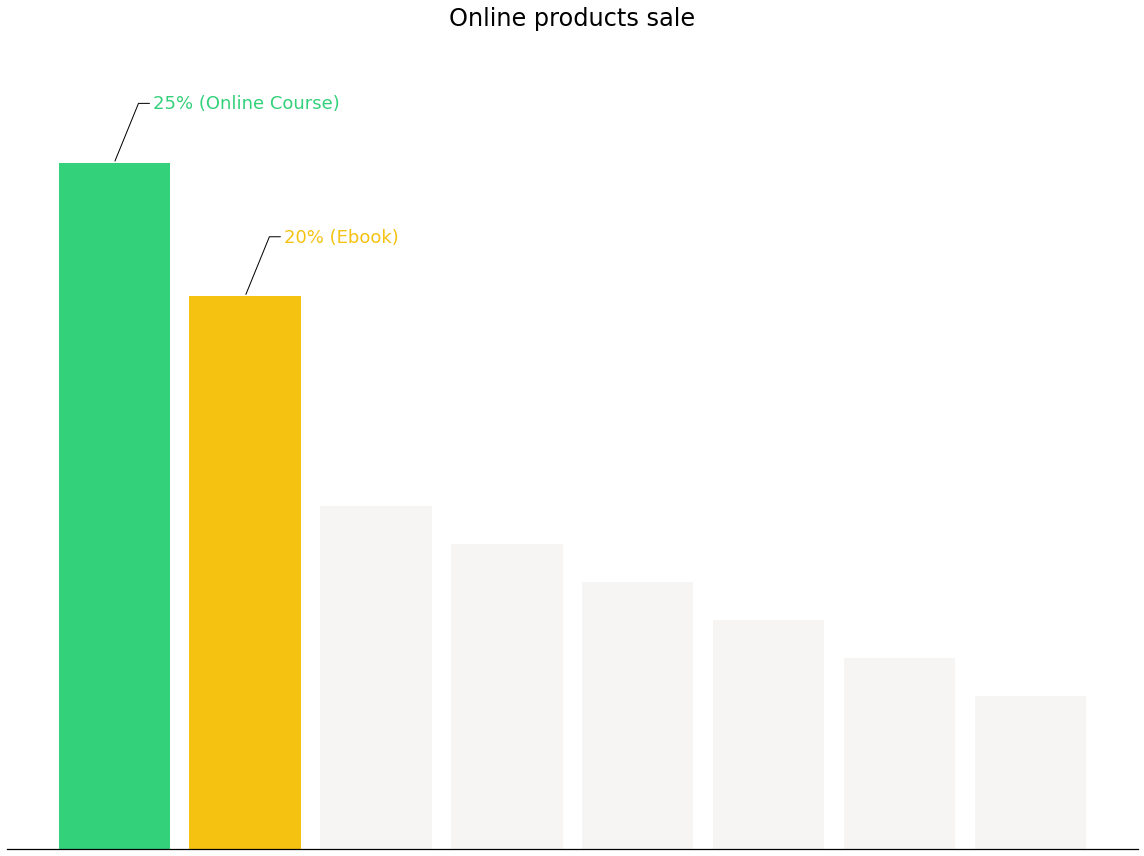

In [12]:
# plot
fig, ax = plt.subplots(
    figsize=(16, 12),
    facecolor="white"
)

# Plot bars
rect1 = ax.bar(
    x=df.index[0],
    height=df["rel"].iloc[0],
    width=0.85,
    color="#33d17a",  # GNOME green 3
    label=df.index[0]
)
rect2 = ax.bar(
    x=df.index[1],
    height=df["rel"].iloc[1],
    width=0.85,
    color="#f5c211",  # GNOME yellow 4
    label=df.index[1]
)
ax.bar(
    x=df.index[2:],
    height=df["rel"].iloc[2:],
    width=0.85,
    color="#f6f5f4"  # GNOME light 2
)

# Add bar data labels
ax.annotate(
    text=f"{df.rel.iloc[0]:.0%} ({df.index[0]})",
    xy=(
        0,
        df["rel"].iloc[0]
    ),
    xytext=(
        0+0.3,
        df["rel"].iloc[0] + 0.02
    ),
    fontsize=18,
    color="#33d17a",  # GNOME green 3
    arrowprops={
        "arrowstyle": "-",
        "connectionstyle": "arc,angleA=0,angleB=0,armA=-15,armB=0,rad=0",
        "relpos": (0, 0.5)
    }
)
ax.annotate(
    text=f"{df.rel.iloc[1]:.0%} ({df.index[1]})",
    xy=(
        1,
        df["rel"].iloc[1]
    ),
    xytext=(
        1+0.3,
        df["rel"].iloc[1] + 0.02
    ),
    fontsize=18,
    color="#f5c211",  # GNOME yellow 4
    arrowprops={
        "arrowstyle": "-",
        "connectionstyle": "arc,angleA=0,angleB=0,armA=-15,armB=0,rad=0",
        "relpos": (0, 0.5)
    }
)

# axis settings
ax.set_title(
    "Online products sale",
    fontsize=24
)

# axis limits
ax.set_ylim((0, 0.3))

# Hide spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.left.set_visible(False)

# remove ticks and tick labels
ax.tick_params(
    left=False,
    labelleft=False,
    bottom=False,
    labelbottom=False
)

# Update thickness of the bottom spine
ax.spines["bottom"].set_linewidth(1.25)

plt.tight_layout()
plt.savefig(
    fname="plot3.png",
    format="png",
    dpi=125
);

## Tweaked stem

As above but with stem plot

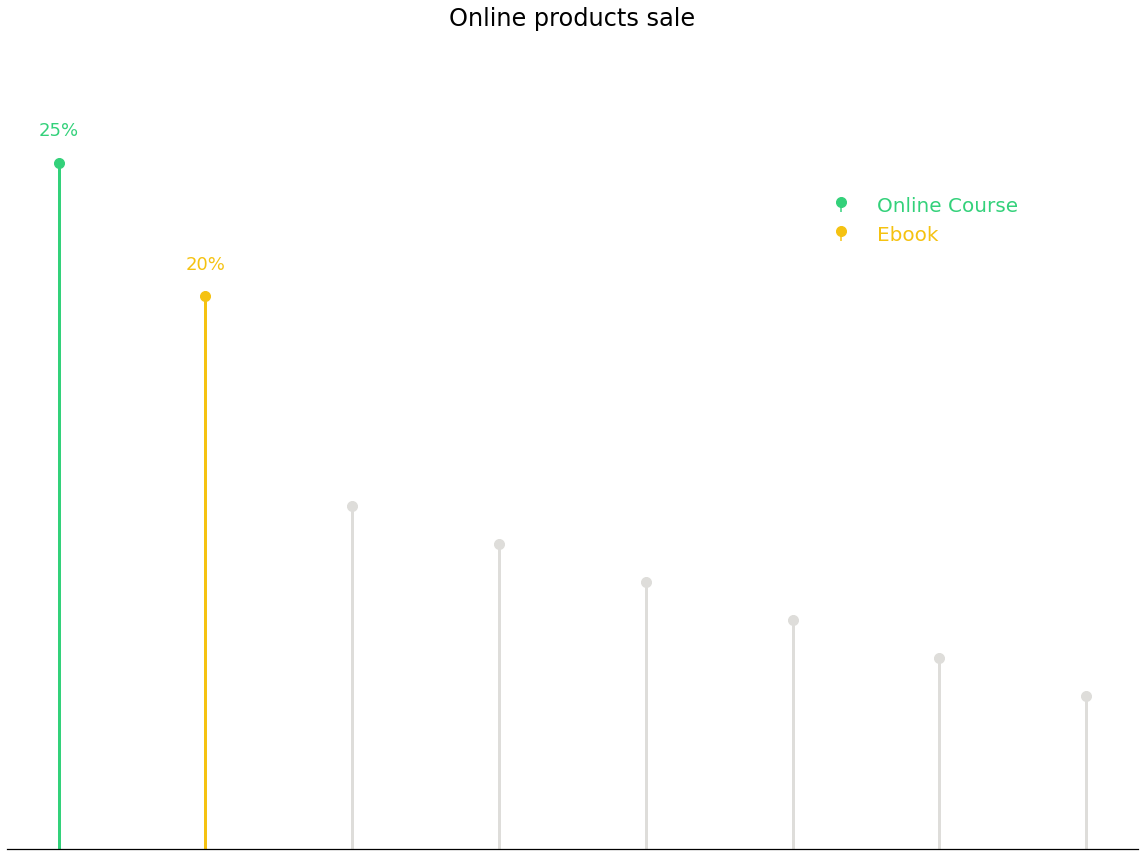

In [13]:
# plot
fig, ax = plt.subplots(
    figsize=(16, 12),
    facecolor="white"
)

# Plot stems
marker_1, stem_1, base_1 = ax.stem(
    df.index[0],
    df["rel"].iloc[0],
    label=df.index[0]
)
marker_2, stem_2, base_2 = ax.stem(
    df.index[1],
    df["rel"].iloc[1],
    label=df.index[1]
)
marker_3, stem_3, base_3 = ax.stem(
    df.index[2:],
    df["rel"].iloc[2:],
)

# update colours
stem_1.set_color("#33d17a")  # GNOME green 3
marker_1.set_markerfacecolor("#33d17a")  # GNOME green 3
marker_1.set_markeredgecolor("#33d17a")  # GNOME green 3

stem_2.set_color("#f5c211")  # GNOME yellow 4
marker_2.set_markerfacecolor("#f5c211")  # GNOME yellow 4
marker_2.set_markeredgecolor("#f5c211")  # GNOME yellow 4

stem_3.set_color("#deddda")  # GNOME light 3
marker_3.set_markerfacecolor("#deddda")  # GNOME light 3
marker_3.set_markeredgecolor("#deddda")  # GNOME light 3

base_1.set_color("None")
base_2.set_color("None")
base_3.set_color("None")

# Update line width and marker size
for stem, marker in ((stem_1, marker_1), (stem_2, marker_2), (stem_3, marker_3)):
    stem.set_linewidth(3)
    marker.set_markersize(10)


# Add stem data labels
ax.text(
    x=df.index[0],
    y=df["rel"].iloc[0] + 0.01,
    s=f"{df.rel.iloc[0]:.0%}",
    fontsize=18,
    color="#33d17a",  # GNOME green 3
    ha="center"
)
ax.text(
    x=df.index[1],
    y=df["rel"].iloc[1] + 0.01,
    s=f"{df.rel.iloc[1]:.0%}",
    fontsize=18,
    color="#f5c211",  # GNOME yellow 4
    ha="center"
)

# axis settings
ax.set_title(
    "Online products sale",
    fontsize=24
)

# axis limits
ax.set_ylim((0, 0.3))

# Hide spines
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.spines.left.set_visible(False)

# remove ticks and tick labels
ax.tick_params(
    left=False,
    labelleft=False,
    bottom=False,
    labelbottom=False
)

# add legend
ax.legend(
    fontsize=20,
    frameon=False,
    bbox_to_anchor=(0.91, 0.82),
    labelcolor=["#33d17a", "#f5c211"]
)

# Update thickness of the bottom spine
ax.spines["bottom"].set_linewidth(1.25)

plt.tight_layout()
plt.savefig(
    fname="plot4.png",
    format="png",
    dpi=125
);